# input

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.drop('Id', axis=1, inplace=True) 

In [4]:
print(min(data['SepalLengthCm']),max(data['SepalLengthCm']))
print(min(data['SepalWidthCm']),max(data['SepalWidthCm']))
print(min(data['PetalLengthCm']),max(data['PetalLengthCm']))
print(min(data['PetalWidthCm']),max(data['PetalWidthCm']))

4.3 7.9
2.0 4.4
1.0 6.9
0.1 2.5


In [5]:
def normalize(x, xmin, xmax):
    nx = x
    nx = (nx-xmin)/(xmax-xmin)
    return nx


def rescale(x, x_min, x_max):
    sx = x
    sx = sx*(x_max-x_min)+x_min
    return sx

In [6]:
features=np.vstack([normalize(data['SepalLengthCm'],4.3 ,7.9),normalize(data['SepalWidthCm'],2.0, 4.4)]).T

In [7]:
features1=np.vstack([normalize(data['PetalLengthCm'],1.0 ,6.9),normalize(data['PetalWidthCm'],0.1 ,2.5)]).T

In [8]:
features2=np.vstack([features.T,features1.T]).T

In [9]:
features2


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [10]:
labels = np.where(data['Species'] == "Iris-setosa", 1, data['Species'])
labels = np.where(labels == "Iris-versicolor", 2, labels)
labels = np.where(labels == "Iris-virginica", 3, labels)
labels=labels.astype('int')



# vizualizacia

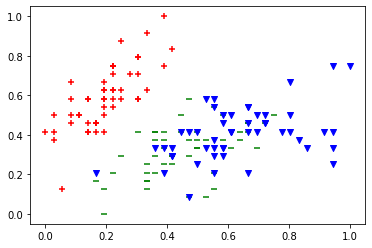

In [11]:
plt.scatter(features2[0:50,0],features2[0:50,1],color="r", marker="+")
plt.scatter(features2[50:99,0],features2[50:99,1],color="g", marker="_")
plt.scatter(features2[99:,0],features2[99:,1],color="b", marker="v")

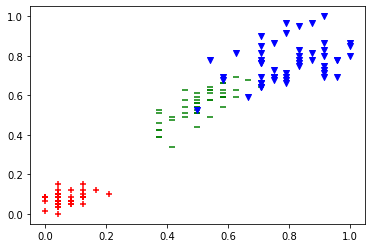

In [12]:
plt.scatter(features2[0:50,3],features2[0:50,2],color="r", marker="+")
plt.scatter(features2[50:99,3],features2[50:99,2],color="g", marker="_")
plt.scatter(features2[99:,3],features2[99:,2],color="b", marker="v")

nech si to nakombinujem ako chcem tak 
Iris-versicolor a
Iris-virginica su podobne

# model

In [136]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
params=[  {'C': [ 10,50, 100,500, 1000], 'gamma': [0.1,0.5,1], 'kernel': ['rbf']}]
clf= GridSearchCV(estimator=svc,param_grid=params,cv=10)
X_train, X_test, Y_train, Y_test = train_test_split(features2, labels, test_size=0.50)
clf.fit(X_train,Y_train)
print(clf.best_params_)
f'{clf.score(X_test,Y_test):0.2%}'

{'C': 50, 'gamma': 0.5, 'kernel': 'rbf'}


'98.67%'

kernel som dal rbf, chyba je 1.33%, neviem ci je moje riesenie dobre ale mohlo by byt dal som 50% test set ciye by malo aj generalizovat

In [140]:
!install sklearn.externals 
import joblib
try:
    estimator = joblib.load("model.pkl")
    print("using trained model")
except:
    print("building new model")
    joblib.dump(clf,"model.pkl")

building new model


In [154]:
a=normalize(float(input('zadaj SepalLengthCm')),4.3 ,7.9)
b=normalize(float(input('zadaj SepalWidthCm')),2.0, 4.4)
c=normalize(float(input('zadaj PetalLengthCm')),1.0 ,6.9)
d=normalize(float(input('zadaj PetalWidthCm')),0.1 ,2.5)
n=np.array([a,b,c,d])
v=clf.predict(n.reshape(1, -1))

zadaj SepalLengthCm 1
zadaj SepalWidthCm 1
zadaj PetalLengthCm 1
zadaj PetalWidthCm 1


In [156]:
print('vystup je'v[0])


1